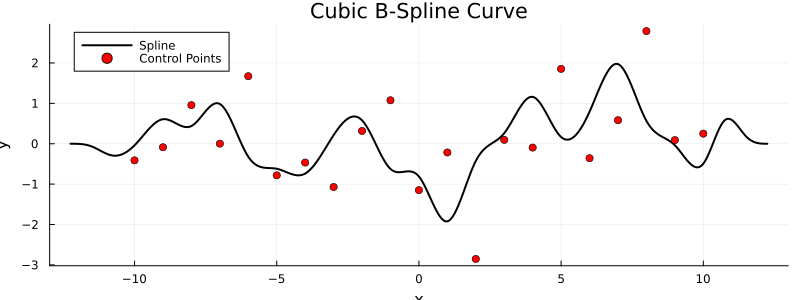

In [2]:
using LinearAlgebra

using Plots

struct BSpline3
    grid_knots::Vector{Float64}  # size must be n + 2 * k + 1, where k = 3 for cubic
    ctrl_points::Vector{Float64}  # size must be n + k
end

function BSpline3(lb::Float64, ub::Float64; n::Int = 20)
    k = 3  # degree 3 for cubic spline
    # control points -- initialize randomly
    cpoints::Vector{Float64} = randn(Float64, n+k)
    grid_pts::Vector{Float64} = LinRange(lb, ub, n+1)
    # add 3 points before lower bound and 3 points after upper bound (k=3)
    pushfirst!(grid_pts, lb-0.75)
    pushfirst!(grid_pts, lb-1.5)
    pushfirst!(grid_pts, lb-2.25)
    push!(grid_pts, ub+0.75)
    push!(grid_pts, ub+1.5)
    push!(grid_pts, ub+2.25)
    BSpline3(grid_pts, cpoints)
end

function basis3(bs::BSpline3, x::Float64)
    n = size(bs.grid_knots)[1] - 1
    
    # zeroth basis function (piecewise constant)
    b0::Vector{Float64} = (x .>= bs.grid_knots[1:end-1]) .& (x .< bs.grid_knots[2:end])
    
    # first basis functions (piecewise linear)
    b1_numerator_left = x .- bs.grid_knots[1:end-2]
    b1_denominator_left = bs.grid_knots[2:end-1] .- bs.grid_knots[1:end-2]
    b1_numerator_right = bs.grid_knots[3:end] .- x  
    b1_denominator_right = bs.grid_knots[3:end] .- bs.grid_knots[2:end-1]
    
    b1::Vector{Float64} = (b1_numerator_left ./ b1_denominator_left) .* b0[1:end-1] + 
                         (b1_numerator_right ./ b1_denominator_right) .* b0[2:end]
    
    # second basis functions (piecewise quadratic)
    b2_numerator_left = x .- bs.grid_knots[1:end-3]
    b2_numerator_right = bs.grid_knots[4:end] .- x  
    b2_denominator_left = bs.grid_knots[3:end-1] .- bs.grid_knots[1:end-3] 
    b2_denominator_right = bs.grid_knots[4:end] .- bs.grid_knots[2:end-2]
    
    b2::Vector{Float64} = (b2_numerator_left ./ b2_denominator_left) .* b1[1:end-1] + 
                         (b2_numerator_right ./ b2_denominator_right) .* b1[2:end]
    
    # third basis functions (piecewise cubic)
    b3_numerator_left = x .- bs.grid_knots[1:end-4]
    b3_numerator_right = bs.grid_knots[5:end] .- x
    b3_denominator_left = bs.grid_knots[4:end-1] .- bs.grid_knots[1:end-4]
    b3_denominator_right = bs.grid_knots[5:end] .- bs.grid_knots[2:end-3]
    
    b3::Vector{Float64} = (b3_numerator_left ./ b3_denominator_left) .* b2[1:end-1] + 
                         (b3_numerator_right ./ b3_denominator_right) .* b2[2:end]
    
    return b0, b1, b2, b3
end

function eval_cubic_spline(bs::BSpline3, x)
    _, _, _, b3 = basis3(bs, x)
    b3 ⋅ bs.ctrl_points
end

bs = BSpline3(-10.0, 10.0)  # fewer control points for clarity
x_range = LinRange(minimum(bs.grid_knots), maximum(bs.grid_knots), 1000)
spline_values = zeros(length(x_range))

for (i, x) in enumerate(x_range)
    spline_values[i] = eval_cubic_spline(bs, x)
end

# Create subplot for the resulting spline
p5 = plot(title="Cubic B-Spline Curve",
xlabel="x",
ylabel="y")

# Plot the spline
plot!(p5, x_range, spline_values, 
label="Spline",
color=:black,
linewidth=2)

# Add control points
scatter!(p5, bs.grid_knots[4:end-3], bs.ctrl_points,
label="Control Points",
color=:red,
markersize=4)

# Combine plots
plot(p5, layout=(5,1), size=(800,300))

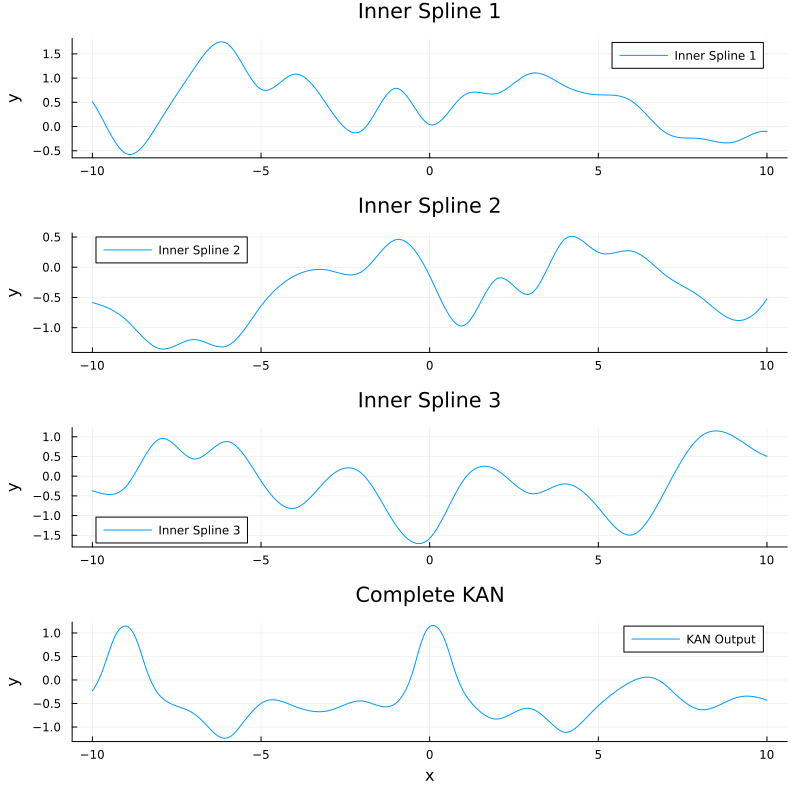

In [3]:
using LinearAlgebra
using Plots

# Reuse the provided BSpline3 and basis3 functions
struct BSpline3
    grid_knots::Vector{Float64}
    ctrl_points::Vector{Float64}
end

function BSpline3(lb::Float64, ub::Float64; n::Int = 20)
    k = 3
    cpoints::Vector{Float64} = randn(Float64, n+k)
    grid_pts::Vector{Float64} = LinRange(lb, ub, n+1)
    
    pushfirst!(grid_pts, lb-0.75)
    pushfirst!(grid_pts, lb-1.5)
    pushfirst!(grid_pts, lb-2.25)
    push!(grid_pts, ub+0.75)
    push!(grid_pts, ub+1.5)
    push!(grid_pts, ub+2.25)
    
    BSpline3(grid_pts, cpoints)
end

function basis3(bs::BSpline3, x::Float64)
    n = size(bs.grid_knots)[1] - 1
    
    b0::Vector{Float64} = (x .>= bs.grid_knots[1:end-1]) .& (x .< bs.grid_knots[2:end])
    
    b1_numerator_left = x .- bs.grid_knots[1:end-2]
    b1_denominator_left = bs.grid_knots[2:end-1] .- bs.grid_knots[1:end-2]
    b1_numerator_right = bs.grid_knots[3:end] .- x
    b1_denominator_right = bs.grid_knots[3:end] .- bs.grid_knots[2:end-1]
    b1::Vector{Float64} = (b1_numerator_left ./ b1_denominator_left) .* b0[1:end-1] + 
                         (b1_numerator_right ./ b1_denominator_right) .* b0[2:end]
    
    b2_numerator_left = x .- bs.grid_knots[1:end-3]
    b2_numerator_right = bs.grid_knots[4:end] .- x
    b2_denominator_left = bs.grid_knots[3:end-1] .- bs.grid_knots[1:end-3]
    b2_denominator_right = bs.grid_knots[4:end] .- bs.grid_knots[2:end-2]
    b2::Vector{Float64} = (b2_numerator_left ./ b2_denominator_left) .* b1[1:end-1] + 
                         (b2_numerator_right ./ b2_denominator_right) .* b1[2:end]
    
    b3_numerator_left = x .- bs.grid_knots[1:end-4]
    b3_numerator_right = bs.grid_knots[5:end] .- x
    b3_denominator_left = bs.grid_knots[4:end-1] .- bs.grid_knots[1:end-4]
    b3_denominator_right = bs.grid_knots[5:end] .- bs.grid_knots[2:end-3]
    b3::Vector{Float64} = (b3_numerator_left ./ b3_denominator_left) .* b2[1:end-1] + 
                         (b3_numerator_right ./ b3_denominator_right) .* b2[2:end]
    
    return b0, b1, b2, b3
end

function eval_cubic_spline(bs::BSpline3, x::Float64)
    _, _, _, b3 = basis3(bs, x)
    return b3 ⋅ bs.ctrl_points
end

# Kolmogorov-Arnold Network structure
struct KAN
    inner_splines::Vector{BSpline3}
    outer_spline::BSpline3
end

function KAN(n_inner::Int=3)
    # Initialize inner splines randomly
    inner_splines = [BSpline3(-10.0, 10.0) for _ in 1:n_inner]
    # Initialize outer spline
    outer_spline = BSpline3(-10.0, 10.0)
    KAN(inner_splines, outer_spline)
end

# Evaluate KAN at a point x
function (kan::KAN)(x::Float64)
    # Evaluate inner splines
    inner_values = [eval_cubic_spline(spline, x) for spline in kan.inner_splines]
    # Sum inner values and evaluate through outer spline
    inner_sum = sum(inner_values)
    return eval_cubic_spline(kan.outer_spline, inner_sum)
end

# Create and visualize a KAN
function plot_kan(x_range)
    kan = KAN(3)  # Create KAN with 3 inner splines
    
    # Evaluate KAN across x range
    kan_values = [kan(x) for x in x_range]
    
    # Create subplots for inner splines
    p1 = plot(layout=(4,1), size=(800,800))
    
    # Plot inner splines
    for (i, spline) in enumerate(kan.inner_splines)
        inner_values = [eval_cubic_spline(spline, x) for x in x_range]
        plot!(p1[i], x_range, inner_values, 
              label="Inner Spline $i", 
              title="Inner Spline $i",
              ylabel="y")
    end
    
    # Plot final KAN output
    plot!(p1[4], x_range, kan_values, 
          label="KAN Output", 
          title="Complete KAN",
          xlabel="x",
          ylabel="y")
    
    return p1
end

# Generate visualization
x_range = LinRange(-10, 10, 1000)
p = plot_kan(x_range)
display(p)

In [4]:
using LinearAlgebra
using Plots
using BenchmarkTools

# ===== Create BSpline 2 Object =====

struct BSpline3
    grid_knots::Vector{Float64}
    ctrl_points::Vector{Float64}
end

function BSpline3(lb::Float64, ub::Float64; n::Int = 20)
    k = 3
    cpoints::Vector{Float64} = randn(Float64, n+k)
    grid_pts::Vector{Float64} = LinRange(lb, ub, n+1)
    
    pushfirst!(grid_pts, lb-0.75)
    pushfirst!(grid_pts, lb-1.5)
    pushfirst!(grid_pts, lb-2.25)
    push!(grid_pts, ub+0.75)
    push!(grid_pts, ub+1.5)
    push!(grid_pts, ub+2.25)
    
    BSpline3(grid_pts, cpoints)
end


# ===== First Degree Basis Functions =====

function basis1(bs::BSpline2, x::Float64, j::Int)
    """
    Compute first-degree (linear) basis function B_{j,1}(x)
    
    This function calculates the value of a first-degree B-spline basis function,
    which consists of two linear pieces forming a "hat" shape.
    
    Parameters:
    - bs: B-spline object containing knot vector
    - x: Point at which to evaluate the basis function
    - j: Index of the basis function
    
    Returns:
    - Value of the basis function at x
    """
    # Check if x is within the support of this basis function
    if x >= bs.grid_knots[j] && x < bs.grid_knots[j+2]
        # Calculate left piece of the hat function
        left_term = (x - bs.grid_knots[j]) / (bs.grid_knots[j+1] - bs.grid_knots[j])
        # Calculate right piece of the hat function
        right_term = (bs.grid_knots[j+2] - x) / (bs.grid_knots[j+2] - bs.grid_knots[j+1])
        
        # Return appropriate piece based on which interval x falls in
        return left_term * (x >= bs.grid_knots[j] && x < bs.grid_knots[j+1]) + 
               right_term * (x >= bs.grid_knots[j+1] && x < bs.grid_knots[j+2])
    end
    # Return 0 if x is outside the support
    return 0.0
end

function basis1_derivative(bs::BSpline2, x::Float64, j::Int)
    """
    Compute derivative of first-degree basis function B_{j,1}'(x)
    
    The derivative of a linear B-spline basis function is piecewise constant:
    - Positive constant in the left interval
    - Negative constant in the right interval
    - Zero elsewhere
    
    Parameters:
    - bs: B-spline object containing knot vector
    - x: Point at which to evaluate the derivative
    - j: Index of the basis function
    """
    if x >= bs.grid_knots[j] && x < bs.grid_knots[j+2]
        if x >= bs.grid_knots[j] && x < bs.grid_knots[j+1]
            # Positive slope in left interval
            return 1.0 / (bs.grid_knots[j+1] - bs.grid_knots[j])
        elseif x >= bs.grid_knots[j+1] && x < bs.grid_knots[j+2]
            # Negative slope in right interval
            return -1.0 / (bs.grid_knots[j+2] - bs.grid_knots[j+1])
        end
    end
    # Zero outside support
    return 0.0
end

# ===== Second Degree Basis Functions =====
function basis2(bs::BSpline2, x::Float64)
    n = size(bs.grid_knots)[1] - 1
    # these are the zeroth basis function
     b0::Vector{Float64} = (x .>= bs.grid_knots[1:end-1]) .& (x .< bs.grid_knots[2:end]) # piecewise constant
    # calculate the first basis functions
    b1_numerator_left = x .-  bs.grid_knots[1:end-2]
    b1_denominator_left = bs.grid_knots[2:end-1] .- bs.grid_knots[1:end-2]
    b1_numerator_right = bs.grid_knots[3:end] .- x  
    b1_denominator_right = bs.grid_knots[3:end]  .- bs.grid_knots[2:end-1]
     # piecewise linear functions
    b1::Vector{Float64} = (b1_numerator_left ./ b1_denominator_left) .* b0[1:end-1] + (b1_numerator_right ./ b1_denominator_right) .* b0[2:end]
    # calculate the second basis functions
    b2_numerator_left = x .- bs.grid_knots[1:end-3]
    b2_numerator_right = bs.grid_knots[4:end] .- x  
    b2_denominator_left = bs.grid_knots[3:end-1] .- bs.grid_knots[1:end-3] 
    b2_denominator_right = bs.grid_knots[4:end] .- bs.grid_knots[2:end-2]
     #piecewise quadratic functions.
    b2::Vector{Float64} = (b2_numerator_left ./ b2_denominator_left) .* b1[1:end-1] + (b2_numerator_right ./ b2_denominator_right) .* b1[2:end]
    return b2
 end

 
function basis2_derivative(bs::BSpline2, x::Float64, j::Int)
    """
    Compute derivative of second-degree basis function B_{j,2}'(x)
    
    Uses the formula for derivatives of B-splines in terms of lower degree basis functions:
    B_{j,2}'(x) = (1/(x_{j+2}-x_j)) * B_{j,1}(x) + 
                   ((x-x_j)/(x_{j+2}-x_j)) * B_{j,1}'(x) -
                   (1/(x_{j+3}-x_{j+1})) * B_{j+1,1}(x) +
                   ((x_{j+3}-x)/(x_{j+3}-x_{j+1})) * B_{j+1,1}'(x)
    """
    # Early return if x is outside the support of this basis function
    if !(bs.grid_knots[j] <= x < bs.grid_knots[j+3])
        return 0.0
    end
    
    # Calculate each term in the derivative formula
    # Term 1: First basis function scaled by reciprocal of knot difference
    term1 = (1.0 / (bs.grid_knots[j+2] - bs.grid_knots[j])) * basis1(bs, x, j)
    
    # Term 2: Derivative of first basis function scaled by normalized distance
    term2 = ((x - bs.grid_knots[j]) / (bs.grid_knots[j+2] - bs.grid_knots[j])) * basis1_derivative(bs, x, j)
    
    # Term 3: Second basis function scaled by reciprocal of knot difference
    term3 = (1.0 / (bs.grid_knots[j+3] - bs.grid_knots[j+1])) * basis1(bs, x, j+1)
    
    # Term 4: Derivative of second basis function scaled by normalized distance
    term4 = ((bs.grid_knots[j+3] - x) / (bs.grid_knots[j+3] - bs.grid_knots[j+1])) * basis1_derivative(bs, x, j+1)
    
    return term1 + term2 - term3 + term4
end

# ===== Complete B-spline Evaluation =====

function eval_derivative(bs::BSpline2, x::Float64)
    """
    Evaluate the derivative of the entire B-spline curve at point x
    
    This function computes the derivative by taking a weighted sum of the
    basis function derivatives, where the weights are the control points.
    """
    n = length(bs.ctrl_points)
    result = 0.0
    
    # Sum over all control points, multiplying each by its basis function derivative
    for j in 1:(n-2)  # Range adjusted for degree 2 B-spline
        result += bs.ctrl_points[j] * basis2_derivative(bs, x, j)
    end
    
    return result
end

function find_critical_points(bs::BSpline2, tolerance::Float64=1e-6)
    x = LinRange(-20.0, 20.0, 10000)
    y_deriv = [eval_derivative(bs, x_i) for x_i in x]
    sign_changes = Float64[]

    for i in 1:(length(y_deriv)-1)
        if sign(y_deriv[i+1]) != sign(y_deriv[i])
            push!(sign_changes, x[i+1])
        end
    end
    return sign_changes
end

function eval_spline(bs::BSpline2, x)
    b2 = basis2(bs, x)
    b2 ⋅ bs.ctrl_points
 end
 
# ===== Visualization =====

function plot_with_critical_points(bs::BSpline2)
    """
    Create a visualization of the B-spline curve with its critical points
    
    Plots:
    1. The original B-spline curve
    2. The derivative of the curve
    3. Critical points marked with red dots
    """
    # Generate x values for plotting
    x = LinRange(-20.0, 20.0, 1000)
    # Evaluate spline at each x
    y = [eval_spline(bs, x_elt) for x_elt in x]
    
    # Find and evaluate critical points
    crit_points = find_critical_points(bs)
    crit_values = [eval_spline(bs, x) for x in crit_points]
    
    # Create main plot with spline curve
    p = plot(x, y, label="spline", legend=:outertopright)
    
    # Add critical points as red dots
    scatter!(crit_points, crit_values, color=:red, 
            markersize=6, label="critical points")
    
    # Add derivative curve
    y_deriv = [eval_derivative(bs, x_elt) for x_elt in x]
    plot!(x, y_deriv, label="derivative", linestyle=:dash)
    print(y_deriv)
    
    return p
end

# Find and display critical points
bs = BSpline2(-10.0, 10.0)
critical_points = find_critical_points(bs)
println("Critical points found at x = ", critical_points)

# Create and display visualization
plot_with_critical_points(bs)


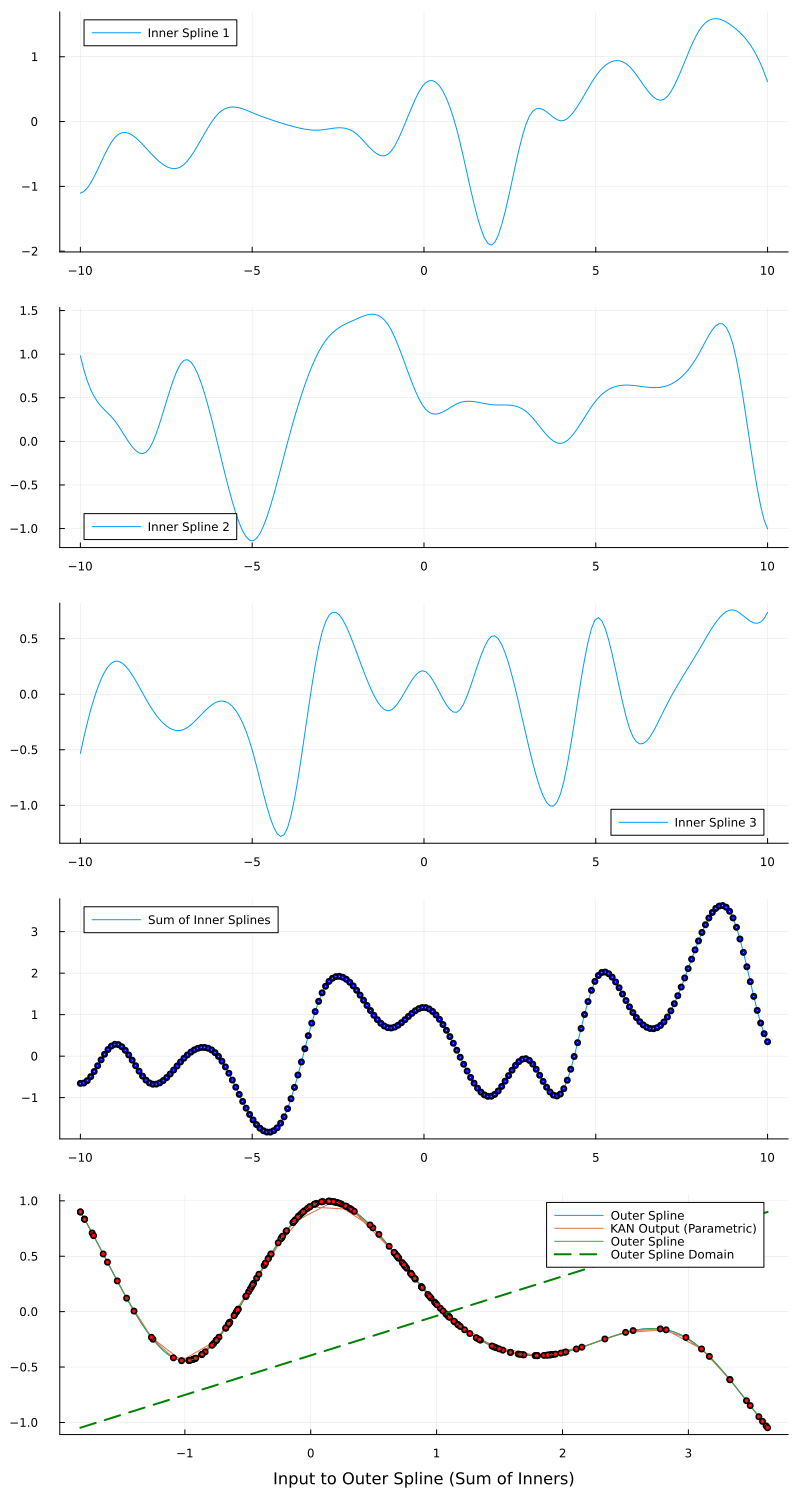

In [1]:
using LinearAlgebra
using Plots

struct BSpline
    grid_knots::Vector{Float64}
    ctrl_points::Vector{Float64}
    degree::Int
end

function BSpline(lb::Float64, ub::Float64, degree::Int; n::Int = 20)
    k = degree
    cpoints::Vector{Float64} = randn(Float64, n+k)
    grid_pts::Vector{Float64} = LinRange(lb, ub, n+1)

    # Add k points before and after the bounds
    for i in 1:k
        pushfirst!(grid_pts, lb - (i * (ub-lb)/(2n)))
        push!(grid_pts, ub + (i * (ub-lb)/(2n)))
    end

    BSpline(grid_pts, cpoints, k)
end

function basis(bs::BSpline, x::Float64)
    n = size(bs.grid_knots)[1] - 1
    k = bs.degree
    # Initialize basis functions array for all degrees
    b = Vector{Vector{Float64}}(undef, k+1)
    # zeroth basis function (piecewise constant)
    b[1] = (x .>= bs.grid_knots[1:end-1]) .& (x .< bs.grid_knots[2:end])

    # compute basis functions for degrees 1 to k
    for degree in 1:k
        b[degree+1] = zeros(Float64, n-degree)
        for i in 1:(n-degree)
            numerator_left = x - bs.grid_knots[i]
            numerator_right = bs.grid_knots[i+degree+1] - x
            denominator_left = bs.grid_knots[i+degree] - bs.grid_knots[i]
            denominator_right = bs.grid_knots[i+degree+1] - bs.grid_knots[i+1]
            if denominator_left == 0.0
                left_term = 0.0
            else
                left_term = (numerator_left / denominator_left) * b[degree][i]
            end
            if denominator_right == 0.0
                right_term = 0.0
            else
                right_term = (numerator_right / denominator_right) * b[degree][i+1]
            end
            b[degree+1][i] = left_term + right_term
        end
    end

    return b
end

function eval_spline(bs::BSpline, x)
    b = basis(bs, x)[bs.degree+1]
    return dot(b, bs.ctrl_points[1:length(b)]) # Ensure control points match basis size
end

struct KAN
    inner_splines::Vector{BSpline}
    outer_spline::BSpline
end

function KAN(n_inner::Int=3)
    # Initialize inner splines randomly
    inner_splines = [BSpline(-10.0, 10.0, 3) for _ in 1:n_inner]
    # Initialize outer spline
    outer_spline = BSpline(-10.0, 10.0, 3)
    KAN(inner_splines, outer_spline)
end

function (kan::KAN)(x::Float64)
    # Evaluate KAN at point x (Sum inner values and evaluate through outer spline)
    inner_values = [eval_spline(spline, x) for spline in kan.inner_splines]
    inner_sum = sum(inner_values)
    return eval_spline(kan.outer_spline, inner_sum)
end

function plot_kan(kan::KAN, x_range::AbstractRange)
    n_inner = length(kan.inner_splines)
    kan_values = [kan(x) for x in x_range]
    inner_sums = [sum(eval_spline(spline, x) for spline in kan.inner_splines) for x in x_range]

    p = plot(layout=(n_inner + 2, 1), size=(800, 300 * (n_inner + 2)))

    # Plot inner splines
    for (i, spline) in enumerate(kan.inner_splines)
        inner_values = [eval_spline(spline, x) for x in x_range]
        plot!(p[i], x_range, inner_values,
              label="Inner Spline $i",
              ylabel="y")
    end

    # Plot the sum of the inner splines
    plot!(p[n_inner + 1], x_range, inner_sums,
          label="Sum of Inner Splines",
          ylabel="Sum")

    # Plot the outer spline
    outer_input_range = extrema(inner_sums)
    outer_x_range = LinRange(outer_input_range[1], outer_input_range[2], 500)
    outer_y_range = [eval_spline(kan.outer_spline, x) for x in outer_x_range]
    plot!(p[n_inner + 2], outer_x_range, outer_y_range,
          label="Outer Spline",
          xlabel="Input to Outer Spline (Sum of Inners)",
          ylabel="Output of Outer Spline")

    # Plot the final KAN output
    plot!(p[n_inner + 2], inner_sums, kan_values,
          label="KAN Output (Parametric)",
          xlabel="Sum of Inner Splines",
          ylabel="KAN Value")

    plot!(p[n_inner + 2], outer_x_range, outer_y_range,
          label="Outer Spline",
          xlabel="Input to Outer Spline (Sum of Inners)",
          ylabel="Output of Outer Spline")

    # Link the sum to the outer spline input
    scatter!(p[n_inner + 1], [x_range[i] for i in 1:length(x_range)], inner_sums, color=:blue, markersize=3, label=false)
    scatter!(p[n_inner + 2], inner_sums, kan_values, color=:red, markersize=3, label=false)
    for i in 1:length(x_range)
        plot!(p[n_inner + 2], [inner_sums[i], inner_sums[i]], [kan_values[i], eval_spline(kan.outer_spline, inner_sums[i])], color=:gray, linestyle=:dash, label=false)
        plot!(p[n_inner + 1], [x_range[i], x_range[i]], [inner_sums[i], inner_sums[i]], color=:lightgray, linestyle=:dot, label=false)
    end

    plot!(p[n_inner + 2], [extrema(inner_sums)...], [extrema([eval_spline(kan.outer_spline, x) for x in extrema(inner_sums)])...], color=:green, linestyle=:dash, linewidth=2, label="Outer Spline Domain")

    return p
end

x_range = LinRange(-10, 10, 200)
kan = KAN(3) # Make a KAN with 3 inner splines
p = plot_kan(kan, x_range)
display(p)